### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

# 1. 데이터 확인

In [2]:
cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')

print('dataset shape:', cust_df.shape)
cust_df.head(5)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


# 2. 데이터 전처리

In [4]:
# 만족:0, 불만족:1
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [5]:
# 전체 응답 중 불만족 비율
total_cnt = cust_df['TARGET'].count()

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

unsatisfied 비율은 0.04


In [6]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
print(cust_df['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [8]:
# var3 피처 값 대체
cust_df['var3'].replace(-999999, 2, inplace=True)

# ID는 필요 없으므로 drop
cust_df.drop('ID', axis=1, inplace=True)

In [9]:
# features, target 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [10]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0, stratify=y_labels)

In [11]:
# 잘 분리되었는지 분포 확인
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape), '\n')

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369) 

 학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


# 3. xgboost 학습

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# XGBClassifier 객체 생성
xgb_clf = XGBClassifier(n_estimators=100, random_state=156)

# 학습 : 성능 평가 지표를 auc로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=30,
            # 원래 검증 셋은 test 말고 다른 데이터 셋으로 해야하지만 여기서는 그냥 test 셋으로 진행함
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82569	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88675	validation_1-auc:0.82453
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8251


# 4. GridSearchCV 적용 후 xgboost 학습

In [14]:
%%time
# 수행시간 4분
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

# colsample_bytree : 컬럼이 너무 많으니 일부 비율로 해서 과적합을 조정하겠다.
# min_child_weight : 트리에서 가지를 추가로 치기 위해 필요한 최소 샘플 수.(> 0)
params = {'max_depth':[5, 7] , 'min_child_weight':[1, 3] , 'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv는 2로 부여함
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=2)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.70366	validation_1-auc:0.67716
[1]	validation_0-auc:0.73343	validation_1-auc:0.70934
[2]	validation_0-auc:0.81615	validation_1-auc:0.78903
[3]	validation_0-auc:0.82280	validation_1-auc:0.79754
[4]	validation_0-auc:0.83742	validation_1-auc:0.80938
[5]	validation_0-auc:0.83918	validation_1-auc:0.81284
[6]	validation_0-auc:0.83796	validation_1-auc:0.80879
[7]	validation_0-auc:0.84455	validation_1-auc:0.81382
[8]	validation_0-auc:0.84339	validation_1-auc:0.80982
[9]	validation_0-auc:0.84052	validation_1-auc:0.80675
[10]	validation_0-auc:0.84759	validation_1-auc:0.81239
[11]	validation_0-auc:0.85094	validation_1-auc:0.81544
[12]	validation_0-auc:0.85348	validation_1-auc:0.81670
[13]	validation_0-auc:0.85428	validation_1-auc:0.81611
[14]	validation_0-auc:0.85523	validation_1-auc:0.81645
[15]	validation_0-auc:0.85738	validation_1-auc:0.81755
[16]	validation_0-auc:0.85788	validation_1-auc:0.81715
[17]	validation_0-auc:0.85944	validation_1-auc:0.81892
[18]	validation_0-au

[49]	validation_0-auc:0.87077	validation_1-auc:0.81435
[50]	validation_0-auc:0.87084	validation_1-auc:0.81400
[51]	validation_0-auc:0.87101	validation_1-auc:0.81340
[0]	validation_0-auc:0.72553	validation_1-auc:0.70455
[1]	validation_0-auc:0.75460	validation_1-auc:0.72813
[2]	validation_0-auc:0.81959	validation_1-auc:0.79165
[3]	validation_0-auc:0.82826	validation_1-auc:0.79958
[4]	validation_0-auc:0.83812	validation_1-auc:0.81009
[5]	validation_0-auc:0.83983	validation_1-auc:0.81117
[6]	validation_0-auc:0.83967	validation_1-auc:0.81095
[7]	validation_0-auc:0.84585	validation_1-auc:0.81543
[8]	validation_0-auc:0.84545	validation_1-auc:0.81212
[9]	validation_0-auc:0.84354	validation_1-auc:0.80809
[10]	validation_0-auc:0.85014	validation_1-auc:0.81630
[11]	validation_0-auc:0.85256	validation_1-auc:0.81850
[12]	validation_0-auc:0.85449	validation_1-auc:0.81947
[13]	validation_0-auc:0.85513	validation_1-auc:0.81890
[14]	validation_0-auc:0.85564	validation_1-auc:0.81616
[15]	validation_0-au

[47]	validation_0-auc:0.88545	validation_1-auc:0.81101
[48]	validation_0-auc:0.88550	validation_1-auc:0.81076
[49]	validation_0-auc:0.88550	validation_1-auc:0.81059
[50]	validation_0-auc:0.88564	validation_1-auc:0.80973
[51]	validation_0-auc:0.88575	validation_1-auc:0.80948
[52]	validation_0-auc:0.88736	validation_1-auc:0.80878
[0]	validation_0-auc:0.70434	validation_1-auc:0.67707
[1]	validation_0-auc:0.73744	validation_1-auc:0.70706
[2]	validation_0-auc:0.81931	validation_1-auc:0.78383
[3]	validation_0-auc:0.83712	validation_1-auc:0.80190
[4]	validation_0-auc:0.84476	validation_1-auc:0.80678
[5]	validation_0-auc:0.84801	validation_1-auc:0.81105
[6]	validation_0-auc:0.84791	validation_1-auc:0.80505
[7]	validation_0-auc:0.85393	validation_1-auc:0.80920
[8]	validation_0-auc:0.85320	validation_1-auc:0.80756
[9]	validation_0-auc:0.85177	validation_1-auc:0.80453
[10]	validation_0-auc:0.85721	validation_1-auc:0.81028
[11]	validation_0-auc:0.86128	validation_1-auc:0.81292
[12]	validation_0-au

[50]	validation_0-auc:0.87397	validation_1-auc:0.81498
[0]	validation_0-auc:0.71498	validation_1-auc:0.69360
[1]	validation_0-auc:0.75427	validation_1-auc:0.72203
[2]	validation_0-auc:0.82159	validation_1-auc:0.79118
[3]	validation_0-auc:0.83215	validation_1-auc:0.80368
[4]	validation_0-auc:0.83808	validation_1-auc:0.80994
[5]	validation_0-auc:0.84037	validation_1-auc:0.81143
[6]	validation_0-auc:0.84035	validation_1-auc:0.80853
[7]	validation_0-auc:0.84562	validation_1-auc:0.81428
[8]	validation_0-auc:0.84566	validation_1-auc:0.80978
[9]	validation_0-auc:0.84490	validation_1-auc:0.80661
[10]	validation_0-auc:0.85133	validation_1-auc:0.81358
[11]	validation_0-auc:0.85450	validation_1-auc:0.81862
[12]	validation_0-auc:0.85641	validation_1-auc:0.82095
[13]	validation_0-auc:0.85615	validation_1-auc:0.81859
[14]	validation_0-auc:0.85791	validation_1-auc:0.82134
[15]	validation_0-auc:0.85961	validation_1-auc:0.82125
[16]	validation_0-auc:0.86082	validation_1-auc:0.82177
[17]	validation_0-au

[2]	validation_0-auc:0.81938	validation_1-auc:0.78798
[3]	validation_0-auc:0.83635	validation_1-auc:0.80346
[4]	validation_0-auc:0.84445	validation_1-auc:0.80766
[5]	validation_0-auc:0.85115	validation_1-auc:0.81193
[6]	validation_0-auc:0.85147	validation_1-auc:0.80898
[7]	validation_0-auc:0.85541	validation_1-auc:0.81378
[8]	validation_0-auc:0.85627	validation_1-auc:0.81016
[9]	validation_0-auc:0.85591	validation_1-auc:0.80328
[10]	validation_0-auc:0.86197	validation_1-auc:0.80453
[11]	validation_0-auc:0.86570	validation_1-auc:0.80741
[12]	validation_0-auc:0.86917	validation_1-auc:0.81076
[13]	validation_0-auc:0.86961	validation_1-auc:0.80990
[14]	validation_0-auc:0.87319	validation_1-auc:0.81272
[15]	validation_0-auc:0.87501	validation_1-auc:0.81287
[16]	validation_0-auc:0.87626	validation_1-auc:0.81306
[17]	validation_0-auc:0.87728	validation_1-auc:0.81236
[18]	validation_0-auc:0.87911	validation_1-auc:0.81280
[19]	validation_0-auc:0.88001	validation_1-auc:0.81316
[20]	validation_0-

[12]	validation_0-auc:0.86957	validation_1-auc:0.81362
[13]	validation_0-auc:0.87064	validation_1-auc:0.81015
[14]	validation_0-auc:0.87177	validation_1-auc:0.81208
[15]	validation_0-auc:0.87325	validation_1-auc:0.81360
[16]	validation_0-auc:0.87413	validation_1-auc:0.81366
[17]	validation_0-auc:0.87506	validation_1-auc:0.81298
[18]	validation_0-auc:0.87587	validation_1-auc:0.81373
[19]	validation_0-auc:0.87686	validation_1-auc:0.81458
[20]	validation_0-auc:0.87733	validation_1-auc:0.81478
[21]	validation_0-auc:0.87844	validation_1-auc:0.81544
[22]	validation_0-auc:0.87881	validation_1-auc:0.81430
[23]	validation_0-auc:0.87894	validation_1-auc:0.81297
[24]	validation_0-auc:0.87908	validation_1-auc:0.81292
[25]	validation_0-auc:0.87962	validation_1-auc:0.81259
[26]	validation_0-auc:0.87959	validation_1-auc:0.81150
[27]	validation_0-auc:0.88000	validation_1-auc:0.81106
[28]	validation_0-auc:0.88041	validation_1-auc:0.81168
[29]	validation_0-auc:0.88083	validation_1-auc:0.81130
[30]	valid

### 하이퍼 파라미터 튜닝을 통해서 성능을 올리는 것보다는, 
### 차라리 ★ 피처 엔지니어링 하는 것이 성능 향상에 더 중요할 때가 많다. 이상치 제거, 표준정규화 

# 시도 : n_estimators는 1000으로 증가, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가

In [15]:
%%time
# 수행시간 1분
# 새로운 하이퍼 파라미터 적용된 XGBClassifier 객체 생성
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)
# reg_alpha : 규제 관련
# 인자 소개 참고 : http://okminseok.blogspot.com/2017/09/ml-xgboost.html

# 학습
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

# 평가(roc auc)
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74740	validation_1-auc:0.71505
[1]	validation_0-auc:0.80809	validation_1-auc:0.77843
[2]	validation_0-auc:0.82836	validation_1-auc:0.79713
[3]	validation_0-auc:0.83198	validation_1-auc:0.80185
[4]	validation_0-auc:0.83391	validation_1-auc:0.80292
[5]	validation_0-auc:0.83600	validation_1-auc:0.80440
[6]	validation_0-auc:0.83882	validation_1-auc:0.80764
[7]	validation_0-auc:0.83807	validation_1-auc:0.80445
[8]	validation_0-auc:0.83869	validation_1-auc:0.80518
[9]	validation_0-auc:0.84188	validation_1-auc:0.80797
[10]	validation_0-auc:0.84285	validation_1-auc:0.80867
[11]	validation_0-auc:0.84307	validation_1-auc:0.80952
[12]	validation_0-auc:0.84365	validation_1-auc:0.80956
[13]	validation_0-auc:0.84393	validation_1-auc:0.81003
[14]	validation_0-auc:0.84390	validation_1-auc:0.81045
[15]	validation_0-auc:0.84264	validation_1-auc:0.80798
[16]	validation_0-auc:0.84292	validation_1-auc:0.80803
[17]	validation_0-auc:0.84444	validation_1-auc:0.80981
[18]	validation_0-au

[149]	validation_0-auc:0.86105	validation_1-auc:0.82080
[150]	validation_0-auc:0.86117	validation_1-auc:0.82077
[151]	validation_0-auc:0.86130	validation_1-auc:0.82027
[152]	validation_0-auc:0.86162	validation_1-auc:0.82074
[153]	validation_0-auc:0.86194	validation_1-auc:0.82100
[154]	validation_0-auc:0.86222	validation_1-auc:0.82119
[155]	validation_0-auc:0.86240	validation_1-auc:0.82134
[156]	validation_0-auc:0.86262	validation_1-auc:0.82147
[157]	validation_0-auc:0.86280	validation_1-auc:0.82140
[158]	validation_0-auc:0.86309	validation_1-auc:0.82146
[159]	validation_0-auc:0.86326	validation_1-auc:0.82153
[160]	validation_0-auc:0.86353	validation_1-auc:0.82147
[161]	validation_0-auc:0.86362	validation_1-auc:0.82167
[162]	validation_0-auc:0.86368	validation_1-auc:0.82153
[163]	validation_0-auc:0.86388	validation_1-auc:0.82146
[164]	validation_0-auc:0.86411	validation_1-auc:0.82154
[165]	validation_0-auc:0.86425	validation_1-auc:0.82149
[166]	validation_0-auc:0.86443	validation_1-auc:

[296]	validation_0-auc:0.87708	validation_1-auc:0.82712
[297]	validation_0-auc:0.87717	validation_1-auc:0.82711
[298]	validation_0-auc:0.87728	validation_1-auc:0.82719
[299]	validation_0-auc:0.87734	validation_1-auc:0.82721
[300]	validation_0-auc:0.87740	validation_1-auc:0.82725
[301]	validation_0-auc:0.87743	validation_1-auc:0.82723
[302]	validation_0-auc:0.87751	validation_1-auc:0.82728
[303]	validation_0-auc:0.87757	validation_1-auc:0.82727
[304]	validation_0-auc:0.87762	validation_1-auc:0.82729
[305]	validation_0-auc:0.87773	validation_1-auc:0.82726
[306]	validation_0-auc:0.87785	validation_1-auc:0.82717
[307]	validation_0-auc:0.87795	validation_1-auc:0.82718
[308]	validation_0-auc:0.87799	validation_1-auc:0.82715
[309]	validation_0-auc:0.87805	validation_1-auc:0.82716
[310]	validation_0-auc:0.87812	validation_1-auc:0.82715
[311]	validation_0-auc:0.87822	validation_1-auc:0.82716
[312]	validation_0-auc:0.87823	validation_1-auc:0.82714
[313]	validation_0-auc:0.87831	validation_1-auc:

[443]	validation_0-auc:0.88521	validation_1-auc:0.82684
[444]	validation_0-auc:0.88524	validation_1-auc:0.82680
[445]	validation_0-auc:0.88528	validation_1-auc:0.82678
[446]	validation_0-auc:0.88538	validation_1-auc:0.82676
[447]	validation_0-auc:0.88539	validation_1-auc:0.82675
[448]	validation_0-auc:0.88548	validation_1-auc:0.82673
[449]	validation_0-auc:0.88549	validation_1-auc:0.82669
[450]	validation_0-auc:0.88553	validation_1-auc:0.82671
[451]	validation_0-auc:0.88556	validation_1-auc:0.82671
[452]	validation_0-auc:0.88563	validation_1-auc:0.82674
[453]	validation_0-auc:0.88567	validation_1-auc:0.82673
[454]	validation_0-auc:0.88572	validation_1-auc:0.82672
[455]	validation_0-auc:0.88576	validation_1-auc:0.82672
[456]	validation_0-auc:0.88580	validation_1-auc:0.82669
[457]	validation_0-auc:0.88581	validation_1-auc:0.82668
[458]	validation_0-auc:0.88583	validation_1-auc:0.82668
[459]	validation_0-auc:0.88589	validation_1-auc:0.82666
[460]	validation_0-auc:0.88595	validation_1-auc:

In [17]:
# 직전 모델에 max_depth만 7로 변경
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.76047	validation_1-auc:0.72325
[1]	validation_0-auc:0.82469	validation_1-auc:0.79016
[2]	validation_0-auc:0.83812	validation_1-auc:0.80097
[3]	validation_0-auc:0.84170	validation_1-auc:0.80390
[4]	validation_0-auc:0.84310	validation_1-auc:0.80441
[5]	validation_0-auc:0.84489	validation_1-auc:0.80712
[6]	validation_0-auc:0.84803	validation_1-auc:0.80887
[7]	validation_0-auc:0.84705	validation_1-auc:0.80490
[8]	validation_0-auc:0.84738	validation_1-auc:0.80630
[9]	validation_0-auc:0.84898	validation_1-auc:0.80802
[10]	validation_0-auc:0.85063	validation_1-auc:0.81022
[11]	validation_0-auc:0.85125	validation_1-auc:0.81018
[12]	validation_0-auc:0.85106	validation_1-auc:0.80951
[13]	validation_0-auc:0.85122	validation_1-auc:0.81007
[14]	validation_0-auc:0.85144	validation_1-auc:0.81064
[15]	validation_0-auc:0.85196	validation_1-auc:0.80891
[16]	validation_0-auc:0.85242	validation_1-auc:0.80965
[17]	validation_0-auc:0.85299	validation_1-auc:0.81017
[18]	validation_0-au

[149]	validation_0-auc:0.88228	validation_1-auc:0.82244
[150]	validation_0-auc:0.88234	validation_1-auc:0.82229
[151]	validation_0-auc:0.88240	validation_1-auc:0.82208
[152]	validation_0-auc:0.88280	validation_1-auc:0.82215
[153]	validation_0-auc:0.88312	validation_1-auc:0.82227
[154]	validation_0-auc:0.88338	validation_1-auc:0.82236
[155]	validation_0-auc:0.88369	validation_1-auc:0.82257
[156]	validation_0-auc:0.88394	validation_1-auc:0.82268
[157]	validation_0-auc:0.88409	validation_1-auc:0.82250
[158]	validation_0-auc:0.88448	validation_1-auc:0.82259
[159]	validation_0-auc:0.88467	validation_1-auc:0.82269
[160]	validation_0-auc:0.88475	validation_1-auc:0.82253
[161]	validation_0-auc:0.88492	validation_1-auc:0.82268
[162]	validation_0-auc:0.88508	validation_1-auc:0.82249
[163]	validation_0-auc:0.88548	validation_1-auc:0.82237
[164]	validation_0-auc:0.88584	validation_1-auc:0.82244
[165]	validation_0-auc:0.88617	validation_1-auc:0.82229
[166]	validation_0-auc:0.88648	validation_1-auc:

[296]	validation_0-auc:0.90728	validation_1-auc:0.82634
[297]	validation_0-auc:0.90732	validation_1-auc:0.82633
[298]	validation_0-auc:0.90738	validation_1-auc:0.82638
[299]	validation_0-auc:0.90744	validation_1-auc:0.82637
[300]	validation_0-auc:0.90754	validation_1-auc:0.82641
[301]	validation_0-auc:0.90756	validation_1-auc:0.82638
[302]	validation_0-auc:0.90764	validation_1-auc:0.82637
[303]	validation_0-auc:0.90767	validation_1-auc:0.82635
[304]	validation_0-auc:0.90775	validation_1-auc:0.82639
[305]	validation_0-auc:0.90806	validation_1-auc:0.82651
[306]	validation_0-auc:0.90810	validation_1-auc:0.82651
[307]	validation_0-auc:0.90818	validation_1-auc:0.82645
[308]	validation_0-auc:0.90841	validation_1-auc:0.82652
[309]	validation_0-auc:0.90842	validation_1-auc:0.82654
[310]	validation_0-auc:0.90848	validation_1-auc:0.82657
[311]	validation_0-auc:0.90861	validation_1-auc:0.82656
[312]	validation_0-auc:0.90877	validation_1-auc:0.82651
[313]	validation_0-auc:0.90885	validation_1-auc:

[443]	validation_0-auc:0.91541	validation_1-auc:0.82511
[444]	validation_0-auc:0.91546	validation_1-auc:0.82507
[445]	validation_0-auc:0.91548	validation_1-auc:0.82503
[446]	validation_0-auc:0.91548	validation_1-auc:0.82502
[447]	validation_0-auc:0.91551	validation_1-auc:0.82500
[448]	validation_0-auc:0.91554	validation_1-auc:0.82500
[449]	validation_0-auc:0.91563	validation_1-auc:0.82497
[450]	validation_0-auc:0.91565	validation_1-auc:0.82495
[451]	validation_0-auc:0.91566	validation_1-auc:0.82494
[452]	validation_0-auc:0.91571	validation_1-auc:0.82497
[453]	validation_0-auc:0.91573	validation_1-auc:0.82496
[454]	validation_0-auc:0.91581	validation_1-auc:0.82495
[455]	validation_0-auc:0.91585	validation_1-auc:0.82493
[456]	validation_0-auc:0.91587	validation_1-auc:0.82491
[457]	validation_0-auc:0.91590	validation_1-auc:0.82491
[458]	validation_0-auc:0.91597	validation_1-auc:0.82496
[459]	validation_0-auc:0.91598	validation_1-auc:0.82493
[460]	validation_0-auc:0.91603	validation_1-auc:

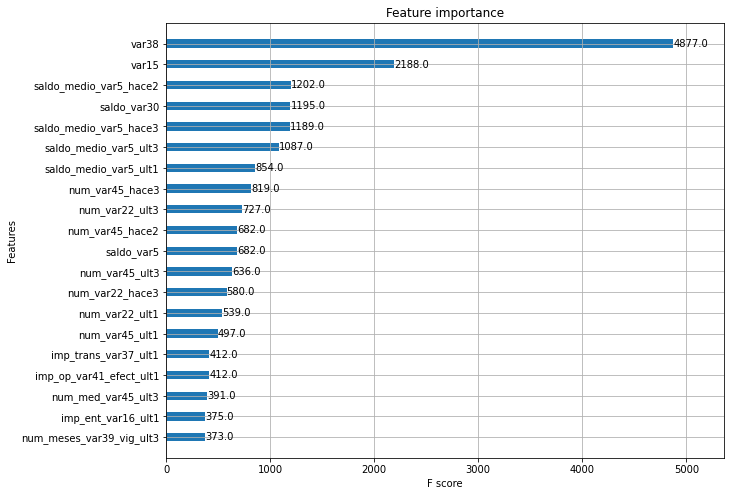

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

# LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [19]:
from lightgbm import LGBMClassifier

# LGBMClassifier 객체 생성
lgbm_clf = LGBMClassifier(n_estimators=500)

# 검증 데이터 지정
evals = [(X_test, y_test)]

# 학습
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)
# 평가(roc auc)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
[2]	valid_0's auc: 0.801789	valid_0's binary_logloss: 0.155038
[3]	valid_0's auc: 0.803367	valid_0's binary_logloss: 0.15185
[4]	valid_0's auc: 0.805168	valid_0's binary_logloss: 0.14961
[5]	valid_0's auc: 0.809401	valid_0's binary_logloss: 0.147695
[6]	valid_0's auc: 0.810671	valid_0's binary_logloss: 0.146234
[7]	valid_0's auc: 0.815356	valid_0's binary_logloss: 0.144877
[8]	valid_0's auc: 0.816777	valid_0's binary_logloss: 0.143783
[9]	valid_0's auc: 0.817821	valid_0's binary_logloss: 0.143084
[10]	valid_0's auc: 0.818637	valid_0's binary_logloss: 0.142272
[11]	valid_0's auc: 0.81939	valid_0's binary_logloss: 0.141623
[12]	valid_0's auc: 0.821106	valid_0's binary_logloss: 0.141043
[13]	valid_0's auc: 0.822008	valid_0's binary_logloss: 0.140628
[14]	valid_0's auc: 0.822584	valid_0's binary_logloss: 0.140198
[15]	valid_0's auc: 0.822291	valid_0's binary_logloss: 0.139909
[16]	valid_0's auc: 0.821862	valid_0's binary_loglos

## 그리드서치CV로 lgbm_clf 수행

In [20]:
%%time
# 그리드서치CV로 lgbm_clf 수행
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

[34]	valid_0's auc: 0.883714	valid_0's binary_logloss: 0.122437	valid_1's auc: 0.818715	valid_1's binary_logloss: 0.138741
[35]	valid_0's auc: 0.884444	valid_0's binary_logloss: 0.122202	valid_1's auc: 0.819226	valid_1's binary_logloss: 0.138704
[36]	valid_0's auc: 0.885362	valid_0's binary_logloss: 0.12189	valid_1's auc: 0.819346	valid_1's binary_logloss: 0.138672
[37]	valid_0's auc: 0.885996	valid_0's binary_logloss: 0.121622	valid_1's auc: 0.819399	valid_1's binary_logloss: 0.138692
[38]	valid_0's auc: 0.886835	valid_0's binary_logloss: 0.121366	valid_1's auc: 0.819064	valid_1's binary_logloss: 0.138756
[39]	valid_0's auc: 0.887453	valid_0's binary_logloss: 0.121114	valid_1's auc: 0.818992	valid_1's binary_logloss: 0.138779
[40]	valid_0's auc: 0.888263	valid_0's binary_logloss: 0.120911	valid_1's auc: 0.819607	valid_1's binary_logloss: 0.138703
[41]	valid_0's auc: 0.888887	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.81928	valid_1's binary_logloss: 0.138762
[42]	valid_0's auc

[63]	valid_0's auc: 0.898751	valid_0's binary_logloss: 0.11649	valid_1's auc: 0.823812	valid_1's binary_logloss: 0.137995
[64]	valid_0's auc: 0.899193	valid_0's binary_logloss: 0.116316	valid_1's auc: 0.823573	valid_1's binary_logloss: 0.138071
[65]	valid_0's auc: 0.89943	valid_0's binary_logloss: 0.116156	valid_1's auc: 0.823702	valid_1's binary_logloss: 0.138043
[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077

[33]	valid_0's auc: 0.884117	valid_0's binary_logloss: 0.122525	valid_1's auc: 0.819285	valid_1's binary_logloss: 0.139001
[34]	valid_0's auc: 0.884674	valid_0's binary_logloss: 0.122289	valid_1's auc: 0.819104	valid_1's binary_logloss: 0.139019
[35]	valid_0's auc: 0.885532	valid_0's binary_logloss: 0.122	valid_1's auc: 0.819038	valid_1's binary_logloss: 0.139043
[36]	valid_0's auc: 0.88599	valid_0's binary_logloss: 0.12177	valid_1's auc: 0.819027	valid_1's binary_logloss: 0.139069
[37]	valid_0's auc: 0.88686	valid_0's binary_logloss: 0.121473	valid_1's auc: 0.818777	valid_1's binary_logloss: 0.139089
[38]	valid_0's auc: 0.887471	valid_0's binary_logloss: 0.121253	valid_1's auc: 0.818768	valid_1's binary_logloss: 0.139111
[39]	valid_0's auc: 0.88802	valid_0's binary_logloss: 0.120994	valid_1's auc: 0.818609	valid_1's binary_logloss: 0.139166
[40]	valid_0's auc: 0.888587	valid_0's binary_logloss: 0.120745	valid_1's auc: 0.818202	valid_1's binary_logloss: 0.13925
[41]	valid_0's auc: 0.88

[60]	valid_0's auc: 0.899458	valid_0's binary_logloss: 0.116376	valid_1's auc: 0.820556	valid_1's binary_logloss: 0.139149
[61]	valid_0's auc: 0.899702	valid_0's binary_logloss: 0.116237	valid_1's auc: 0.820125	valid_1's binary_logloss: 0.139246
[62]	valid_0's auc: 0.899902	valid_0's binary_logloss: 0.116093	valid_1's auc: 0.819912	valid_1's binary_logloss: 0.139303
[63]	valid_0's auc: 0.900221	valid_0's binary_logloss: 0.115907	valid_1's auc: 0.819617	valid_1's binary_logloss: 0.139362
[64]	valid_0's auc: 0.900678	valid_0's binary_logloss: 0.115762	valid_1's auc: 0.819416	valid_1's binary_logloss: 0.139423
[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 

[31]	valid_0's auc: 0.880213	valid_0's binary_logloss: 0.123503	valid_1's auc: 0.826127	valid_1's binary_logloss: 0.137382
[32]	valid_0's auc: 0.880836	valid_0's binary_logloss: 0.123243	valid_1's auc: 0.825755	valid_1's binary_logloss: 0.137402
[33]	valid_0's auc: 0.881453	valid_0's binary_logloss: 0.122975	valid_1's auc: 0.825597	valid_1's binary_logloss: 0.137411
[34]	valid_0's auc: 0.882559	valid_0's binary_logloss: 0.122715	valid_1's auc: 0.826384	valid_1's binary_logloss: 0.13731
[35]	valid_0's auc: 0.883437	valid_0's binary_logloss: 0.122445	valid_1's auc: 0.826447	valid_1's binary_logloss: 0.137286
[36]	valid_0's auc: 0.884191	valid_0's binary_logloss: 0.12216	valid_1's auc: 0.826179	valid_1's binary_logloss: 0.1373
[37]	valid_0's auc: 0.884759	valid_0's binary_logloss: 0.121932	valid_1's auc: 0.826032	valid_1's binary_logloss: 0.137346
[38]	valid_0's auc: 0.885276	valid_0's binary_logloss: 0.121663	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.137457
[39]	valid_0's auc: 

[57]	valid_0's auc: 0.896231	valid_0's binary_logloss: 0.117369	valid_1's auc: 0.820107	valid_1's binary_logloss: 0.138758
[58]	valid_0's auc: 0.896571	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.820469	valid_1's binary_logloss: 0.138727
[59]	valid_0's auc: 0.897178	valid_0's binary_logloss: 0.116996	valid_1's auc: 0.820552	valid_1's binary_logloss: 0.138722
[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.8

[26]	valid_0's auc: 0.894455	valid_0's binary_logloss: 0.118868	valid_1's auc: 0.824649	valid_1's binary_logloss: 0.138212
[27]	valid_0's auc: 0.895822	valid_0's binary_logloss: 0.118346	valid_1's auc: 0.824744	valid_1's binary_logloss: 0.138218
[28]	valid_0's auc: 0.897004	valid_0's binary_logloss: 0.117874	valid_1's auc: 0.823912	valid_1's binary_logloss: 0.138286
[29]	valid_0's auc: 0.89793	valid_0's binary_logloss: 0.117407	valid_1's auc: 0.824227	valid_1's binary_logloss: 0.138235
[30]	valid_0's auc: 0.899425	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.824088	valid_1's binary_logloss: 0.138252
[31]	valid_0's auc: 0.900184	valid_0's binary_logloss: 0.116507	valid_1's auc: 0.824164	valid_1's binary_logloss: 0.138274
[32]	valid_0's auc: 0.901269	valid_0's binary_logloss: 0.116073	valid_1's auc: 0.824243	valid_1's binary_logloss: 0.138299
[33]	valid_0's auc: 0.901903	valid_0's binary_logloss: 0.115707	valid_1's auc: 0.824155	valid_1's binary_logloss: 0.13831
[34]	valid_0's auc

[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_logloss: 0.143227
[8]	valid_0's auc: 0.869312	valid_0's binary_logloss: 0.133962	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.142144
[9]	valid_0's auc: 0.871504	v

[26]	valid_0's auc: 0.893869	valid_0's binary_logloss: 0.119334	valid_1's auc: 0.819766	valid_1's binary_logloss: 0.138786
[27]	valid_0's auc: 0.894998	valid_0's binary_logloss: 0.118864	valid_1's auc: 0.819227	valid_1's binary_logloss: 0.138861
[28]	valid_0's auc: 0.896117	valid_0's binary_logloss: 0.118341	valid_1's auc: 0.81867	valid_1's binary_logloss: 0.138938
[29]	valid_0's auc: 0.89756	valid_0's binary_logloss: 0.117873	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.138904
[30]	valid_0's auc: 0.898703	valid_0's binary_logloss: 0.117429	valid_1's auc: 0.818993	valid_1's binary_logloss: 0.138918
[31]	valid_0's auc: 0.899471	valid_0's binary_logloss: 0.116963	valid_1's auc: 0.818384	valid_1's binary_logloss: 0.139055
[32]	valid_0's auc: 0.900441	valid_0's binary_logloss: 0.116554	valid_1's auc: 0.818627	valid_1's binary_logloss: 0.13899
[33]	valid_0's auc: 0.901872	valid_0's binary_logloss: 0.116143	valid_1's auc: 0.818317	valid_1's binary_logloss: 0.139032
[34]	valid_0's auc:

[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

[22]	valid_0's auc: 0.891429	valid_0's binary_logloss: 0.120644	valid_1's auc: 0.822277	valid_1's binary_logloss: 0.138453
[23]	valid_0's auc: 0.892777	valid_0's binary_logloss: 0.120072	valid_1's auc: 0.822197	valid_1's binary_logloss: 0.138459
[24]	valid_0's auc: 0.894029	valid_0's binary_logloss: 0.119519	valid_1's auc: 0.821629	valid_1's binary_logloss: 0.138487
[25]	valid_0's auc: 0.895594	valid_0's binary_logloss: 0.118958	valid_1's auc: 0.821588	valid_1's binary_logloss: 0.138426
[26]	valid_0's auc: 0.896702	valid_0's binary_logloss: 0.11845	valid_1's auc: 0.821826	valid_1's binary_logloss: 0.138381
[27]	valid_0's auc: 0.897644	valid_0's binary_logloss: 0.117982	valid_1's auc: 0.821107	valid_1's binary_logloss: 0.138451
[28]	valid_0's auc: 0.898974	valid_0's binary_logloss: 0.117526	valid_1's auc: 0.821096	valid_1's binary_logloss: 0.138465
[29]	valid_0's auc: 0.899928	valid_0's binary_logloss: 0.117079	valid_1's auc: 0.820441	valid_1's binary_logloss: 0.138539
[30]	valid_0's au

[40]	valid_0's auc: 0.909654	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.826457	valid_1's binary_logloss: 0.137353
[41]	valid_0's auc: 0.910169	valid_0's binary_logloss: 0.112488	valid_1's auc: 0.825773	valid_1's binary_logloss: 0.137519
[42]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.112106	valid_1's auc: 0.82574	valid_1's binary_logloss: 0.137541
[43]	valid_0's auc: 0.911244	valid_0's binary_logloss: 0.11179	valid_1's auc: 0.825732	valid_1's binary_logloss: 0.137582
[44]	valid_0's auc: 0.911916	valid_0's binary_logloss: 0.111456	valid_1's auc: 0.825423	valid_1's binary_logloss: 0.137668
[45]	valid_0's auc: 0.912793	valid_0's binary_logloss: 0.111076	valid_1's auc: 0.824677	valid_1's binary_logloss: 0.13788
[46]	valid_0's auc: 0.913666	valid_0's binary_logloss: 0.110713	valid_1's auc: 0.824923	valid_1's binary_logloss: 0.137871
[47]	valid_0's auc: 0.914107	valid_0's binary_logloss: 0.110407	valid_1's auc: 0.825184	valid_1's binary_logloss: 0.137826
[48]	valid_0's auc:

[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

[48]	valid_0's auc: 0.888704	valid_0's binary_logloss: 0.120266	valid_1's auc: 0.820171	valid_1's binary_logloss: 0.138981
[49]	valid_0's auc: 0.88931	valid_0's binary_logloss: 0.120025	valid_1's auc: 0.819975	valid_1's binary_logloss: 0.139023
[50]	valid_0's auc: 0.890421	valid_0's binary_logloss: 0.119788	valid_1's auc: 0.820157	valid_1's binary_logloss: 0.139025
[51]	valid_0's auc: 0.891129	valid_0's binary_logloss: 0.119591	valid_1's auc: 0.82024	valid_1's binary_logloss: 0.13901
[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.8485

[25]	valid_0's auc: 0.873137	valid_0's binary_logloss: 0.126103	valid_1's auc: 0.824367	valid_1's binary_logloss: 0.137977
[26]	valid_0's auc: 0.874118	valid_0's binary_logloss: 0.125744	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.137885
[27]	valid_0's auc: 0.874857	valid_0's binary_logloss: 0.125431	valid_1's auc: 0.824174	valid_1's binary_logloss: 0.13787
[28]	valid_0's auc: 0.875665	valid_0's binary_logloss: 0.125122	valid_1's auc: 0.82382	valid_1's binary_logloss: 0.137903
[29]	valid_0's auc: 0.877043	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.824558	valid_1's binary_logloss: 0.137788
[30]	valid_0's auc: 0.877659	valid_0's binary_logloss: 0.124504	valid_1's auc: 0.824525	valid_1's binary_logloss: 0.137796
[31]	valid_0's auc: 0.878567	valid_0's binary_logloss: 0.124194	valid_1's auc: 0.824265	valid_1's binary_logloss: 0.137829
[32]	valid_0's auc: 0.879226	valid_0's binary_logloss: 0.123911	valid_1's auc: 0.82428	valid_1's binary_logloss: 0.137823
[33]	valid_0's auc: 

[30]	valid_0's auc: 0.876565	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.822873	valid_1's binary_logloss: 0.138086
[31]	valid_0's auc: 0.877403	valid_0's binary_logloss: 0.124526	valid_1's auc: 0.822968	valid_1's binary_logloss: 0.138056
[32]	valid_0's auc: 0.878277	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.82373	valid_1's binary_logloss: 0.137851
[33]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.12395	valid_1's auc: 0.822852	valid_1's binary_logloss: 0.13795
[34]	valid_0's auc: 0.879568	valid_0's binary_logloss: 0.123725	valid_1's auc: 0.823127	valid_1's binary_logloss: 0.137939
[35]	valid_0's auc: 0.880257	valid_0's binary_logloss: 0.123512	valid_1's auc: 0.823452	valid_1's binary_logloss: 0.137875
[36]	valid_0's auc: 0.881271	valid_0's binary_logloss: 0.123201	valid_1's auc: 0.823333	valid_1's binary_logloss: 0.137894
[37]	valid_0's auc: 0.881844	valid_0's binary_logloss: 0.12297	valid_1's auc: 0.823329	valid_1's binary_logloss: 0.137863
[38]	valid_0's auc: 0

[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

[28]	valid_0's auc: 0.875901	valid_0's binary_logloss: 0.125195	valid_1's auc: 0.823311	valid_1's binary_logloss: 0.137916
[29]	valid_0's auc: 0.876594	valid_0's binary_logloss: 0.124879	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.137896
[30]	valid_0's auc: 0.877343	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.823337	valid_1's binary_logloss: 0.137851
[31]	valid_0's auc: 0.87822	valid_0's binary_logloss: 0.124344	valid_1's auc: 0.823737	valid_1's binary_logloss: 0.137796
[32]	valid_0's auc: 0.879346	valid_0's binary_logloss: 0.124082	valid_1's auc: 0.823421	valid_1's binary_logloss: 0.137812
[33]	valid_0's auc: 0.879904	valid_0's binary_logloss: 0.123818	valid_1's auc: 0.823221	valid_1's binary_logloss: 0.137811
[34]	valid_0's auc: 0.880592	valid_0's binary_logloss: 0.123567	valid_1's auc: 0.823488	valid_1's binary_logloss: 0.137772
[35]	valid_0's auc: 0.881157	valid_0's binary_logloss: 0.123306	valid_1's auc: 0.823566	valid_1's binary_logloss: 0.137762
[36]	valid_0's au

[56]	valid_0's auc: 0.893385	valid_0's binary_logloss: 0.11845	valid_1's auc: 0.824707	valid_1's binary_logloss: 0.138151
[57]	valid_0's auc: 0.893725	valid_0's binary_logloss: 0.118271	valid_1's auc: 0.824554	valid_1's binary_logloss: 0.1382
[58]	valid_0's auc: 0.894161	valid_0's binary_logloss: 0.118066	valid_1's auc: 0.824282	valid_1's binary_logloss: 0.138212
[59]	valid_0's auc: 0.894562	valid_0's binary_logloss: 0.117884	valid_1's auc: 0.824157	valid_1's binary_logloss: 0.13827
[60]	valid_0's auc: 0.894805	valid_0's binary_logloss: 0.117767	valid_1's auc: 0.823968	valid_1's binary_logloss: 0.138307
[61]	valid_0's auc: 0.89537	valid_0's binary_logloss: 0.117603	valid_1's auc: 0.823855	valid_1's binary_logloss: 0.138324
[62]	valid_0's auc: 0.895687	valid_0's binary_logloss: 0.117459	valid_1's auc: 0.823822	valid_1's binary_logloss: 0.138348
[63]	valid_0's auc: 0.895912	valid_0's binary_logloss: 0.117323	valid_1's auc: 0.823535	valid_1's binary_logloss: 0.138407
[64]	valid_0's auc: 0

[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

[23]	valid_0's auc: 0.887949	valid_0's binary_logloss: 0.122019	valid_1's auc: 0.821358	valid_1's binary_logloss: 0.138646
[24]	valid_0's auc: 0.889165	valid_0's binary_logloss: 0.12147	valid_1's auc: 0.821183	valid_1's binary_logloss: 0.138605
[25]	valid_0's auc: 0.890399	valid_0's binary_logloss: 0.120924	valid_1's auc: 0.821118	valid_1's binary_logloss: 0.138528
[26]	valid_0's auc: 0.892025	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.821487	valid_1's binary_logloss: 0.138474
[27]	valid_0's auc: 0.893022	valid_0's binary_logloss: 0.119909	valid_1's auc: 0.821709	valid_1's binary_logloss: 0.138438
[28]	valid_0's auc: 0.893993	valid_0's binary_logloss: 0.119446	valid_1's auc: 0.821659	valid_1's binary_logloss: 0.13852
[29]	valid_0's auc: 0.895065	valid_0's binary_logloss: 0.119037	valid_1's auc: 0.821653	valid_1's binary_logloss: 0.138534
[30]	valid_0's auc: 0.896209	valid_0's binary_logloss: 0.118574	valid_1's auc: 0.821737	valid_1's binary_logloss: 0.138558
[31]	valid_0's auc

[43]	valid_0's auc: 0.908822	valid_0's binary_logloss: 0.113517	valid_1's auc: 0.823149	valid_1's binary_logloss: 0.138583
[44]	valid_0's auc: 0.909478	valid_0's binary_logloss: 0.113198	valid_1's auc: 0.822775	valid_1's binary_logloss: 0.138662
[45]	valid_0's auc: 0.910001	valid_0's binary_logloss: 0.112882	valid_1's auc: 0.822333	valid_1's binary_logloss: 0.138743
[46]	valid_0's auc: 0.910727	valid_0's binary_logloss: 0.112531	valid_1's auc: 0.822249	valid_1's binary_logloss: 0.138777
[47]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.112215	valid_1's auc: 0.821694	valid_1's binary_logloss: 0.138922
[48]	valid_0's auc: 0.911874	valid_0's binary_logloss: 0.1119	valid_1's auc: 0.821862	valid_1's binary_logloss: 0.138959
[49]	valid_0's auc: 0.912578	valid_0's binary_logloss: 0.111575	valid_1's auc: 0.82161	valid_1's binary_logloss: 0.139005
[50]	valid_0's auc: 0.913081	valid_0's binary_logloss: 0.111271	valid_1's auc: 0.821585	valid_1's binary_logloss: 0.139027
[51]	valid_0's auc:

[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

[24]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.121264	valid_1's auc: 0.819606	valid_1's binary_logloss: 0.139123
[25]	valid_0's auc: 0.891025	valid_0's binary_logloss: 0.120735	valid_1's auc: 0.819693	valid_1's binary_logloss: 0.139106
[26]	valid_0's auc: 0.89198	valid_0's binary_logloss: 0.120238	valid_1's auc: 0.819049	valid_1's binary_logloss: 0.139236
[27]	valid_0's auc: 0.893347	valid_0's binary_logloss: 0.119779	valid_1's auc: 0.819769	valid_1's binary_logloss: 0.139101
[28]	valid_0's auc: 0.894204	valid_0's binary_logloss: 0.11931	valid_1's auc: 0.818943	valid_1's binary_logloss: 0.139193
[29]	valid_0's auc: 0.895214	valid_0's binary_logloss: 0.11886	valid_1's auc: 0.818919	valid_1's binary_logloss: 0.139221
[30]	valid_0's auc: 0.896111	valid_0's binary_logloss: 0.118429	valid_1's auc: 0.818726	valid_1's binary_logloss: 0.139258
[31]	valid_0's auc: 0.897138	valid_0's binary_logloss: 0.11796	valid_1's auc: 0.818598	valid_1's binary_logloss: 0.139244
[32]	valid_0's auc: 

[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

[26]	valid_0's auc: 0.890805	valid_0's binary_logloss: 0.120455	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137283
[27]	valid_0's auc: 0.892121	valid_0's binary_logloss: 0.119906	valid_1's auc: 0.825287	valid_1's binary_logloss: 0.13723
[28]	valid_0's auc: 0.893215	valid_0's binary_logloss: 0.119459	valid_1's auc: 0.824808	valid_1's binary_logloss: 0.137302
[29]	valid_0's auc: 0.894188	valid_0's binary_logloss: 0.119008	valid_1's auc: 0.824825	valid_1's binary_logloss: 0.137329
[30]	valid_0's auc: 0.895836	valid_0's binary_logloss: 0.11849	valid_1's auc: 0.824906	valid_1's binary_logloss: 0.137347
[31]	valid_0's auc: 0.896548	valid_0's binary_logloss: 0.118078	valid_1's auc: 0.824233	valid_1's binary_logloss: 0.137474
[32]	valid_0's auc: 0.898112	valid_0's binary_logloss: 0.117647	valid_1's auc: 0.824965	valid_1's binary_logloss: 0.137403
[33]	valid_0's auc: 0.898895	valid_0's binary_logloss: 0.11719	valid_1's auc: 0.825124	valid_1's binary_logloss: 0.137401
[34]	valid_0's auc:

[36]	valid_0's auc: 0.902313	valid_0's binary_logloss: 0.116115	valid_1's auc: 0.821721	valid_1's binary_logloss: 0.138224
[37]	valid_0's auc: 0.903124	valid_0's binary_logloss: 0.115731	valid_1's auc: 0.821567	valid_1's binary_logloss: 0.138267
[38]	valid_0's auc: 0.903957	valid_0's binary_logloss: 0.115319	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.138351
[39]	valid_0's auc: 0.904581	valid_0's binary_logloss: 0.114947	valid_1's auc: 0.821037	valid_1's binary_logloss: 0.138409
[40]	valid_0's auc: 0.905145	valid_0's binary_logloss: 0.114638	valid_1's auc: 0.820517	valid_1's binary_logloss: 0.138521
[41]	valid_0's auc: 0.90589	valid_0's binary_logloss: 0.114268	valid_1's auc: 0.820541	valid_1's binary_logloss: 0.138565
[42]	valid_0's auc: 0.906642	valid_0's binary_logloss: 0.113938	valid_1's auc: 0.820429	valid_1's binary_logloss: 0.138602
[43]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.81994	valid_1's binary_logloss: 0.138708
[44]	valid_0's auc

[50]	valid_0's auc: 0.912079	valid_0's binary_logloss: 0.111014	valid_1's auc: 0.813462	valid_1's binary_logloss: 0.140801
[51]	valid_0's auc: 0.912547	valid_0's binary_logloss: 0.110706	valid_1's auc: 0.813392	valid_1's binary_logloss: 0.140892
[52]	valid_0's auc: 0.912833	valid_0's binary_logloss: 0.110433	valid_1's auc: 0.81361	valid_1's binary_logloss: 0.140881
[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.84

[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

[33]	valid_0's auc: 0.881453	valid_0's binary_logloss: 0.122975	valid_1's auc: 0.825597	valid_1's binary_logloss: 0.137411
[34]	valid_0's auc: 0.882559	valid_0's binary_logloss: 0.122715	valid_1's auc: 0.826384	valid_1's binary_logloss: 0.13731
[35]	valid_0's auc: 0.883437	valid_0's binary_logloss: 0.122445	valid_1's auc: 0.826447	valid_1's binary_logloss: 0.137286
[36]	valid_0's auc: 0.884191	valid_0's binary_logloss: 0.12216	valid_1's auc: 0.826179	valid_1's binary_logloss: 0.1373
[37]	valid_0's auc: 0.884759	valid_0's binary_logloss: 0.121932	valid_1's auc: 0.826032	valid_1's binary_logloss: 0.137346
[38]	valid_0's auc: 0.885276	valid_0's binary_logloss: 0.121663	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.137457
[39]	valid_0's auc: 0.886191	valid_0's binary_logloss: 0.121367	valid_1's auc: 0.825841	valid_1's binary_logloss: 0.137487
[40]	valid_0's auc: 0.887378	valid_0's binary_logloss: 0.121027	valid_1's auc: 0.825564	valid_1's binary_logloss: 0.13752
[41]	valid_0's auc: 0

[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

[32]	valid_0's auc: 0.881796	valid_0's binary_logloss: 0.122883	valid_1's auc: 0.823347	valid_1's binary_logloss: 0.138455
[33]	valid_0's auc: 0.882529	valid_0's binary_logloss: 0.12256	valid_1's auc: 0.823453	valid_1's binary_logloss: 0.138441
[34]	valid_0's auc: 0.883271	valid_0's binary_logloss: 0.122296	valid_1's auc: 0.8237	valid_1's binary_logloss: 0.138398
[35]	valid_0's auc: 0.883898	valid_0's binary_logloss: 0.122031	valid_1's auc: 0.823384	valid_1's binary_logloss: 0.13841
[36]	valid_0's auc: 0.884824	valid_0's binary_logloss: 0.121725	valid_1's auc: 0.823221	valid_1's binary_logloss: 0.138408
[37]	valid_0's auc: 0.885748	valid_0's binary_logloss: 0.121461	valid_1's auc: 0.8229	valid_1's binary_logloss: 0.138468
[38]	valid_0's auc: 0.886762	valid_0's binary_logloss: 0.121161	valid_1's auc: 0.822944	valid_1's binary_logloss: 0.138497
[39]	valid_0's auc: 0.887798	valid_0's binary_logloss: 0.120826	valid_1's auc: 0.822644	valid_1's binary_logloss: 0.138556
[40]	valid_0's auc: 0.

[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_logloss: 0.140116	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.145137
[7]	valid_0's auc: 0.853091	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.143781
[8]	valid_0's auc: 0.855444	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.822315	valid_1's binary_logloss: 0.142784
[9]	valid_0's auc: 0.8575

[32]	valid_0's auc: 0.881251	valid_0's binary_logloss: 0.123235	valid_1's auc: 0.823749	valid_1's binary_logloss: 0.137994
[33]	valid_0's auc: 0.881917	valid_0's binary_logloss: 0.122975	valid_1's auc: 0.823695	valid_1's binary_logloss: 0.138002
[34]	valid_0's auc: 0.882751	valid_0's binary_logloss: 0.122651	valid_1's auc: 0.823256	valid_1's binary_logloss: 0.13811
[35]	valid_0's auc: 0.883135	valid_0's binary_logloss: 0.122457	valid_1's auc: 0.823342	valid_1's binary_logloss: 0.138124
[36]	valid_0's auc: 0.883794	valid_0's binary_logloss: 0.122194	valid_1's auc: 0.823095	valid_1's binary_logloss: 0.138138
[37]	valid_0's auc: 0.884987	valid_0's binary_logloss: 0.121891	valid_1's auc: 0.823242	valid_1's binary_logloss: 0.138109
[38]	valid_0's auc: 0.885575	valid_0's binary_logloss: 0.121649	valid_1's auc: 0.823154	valid_1's binary_logloss: 0.13813
[39]	valid_0's auc: 0.886317	valid_0's binary_logloss: 0.121382	valid_1's auc: 0.82276	valid_1's binary_logloss: 0.138211
[40]	valid_0's auc:

[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

[21]	valid_0's auc: 0.889743	valid_0's binary_logloss: 0.121229	valid_1's auc: 0.822421	valid_1's binary_logloss: 0.138581
[22]	valid_0's auc: 0.891429	valid_0's binary_logloss: 0.120644	valid_1's auc: 0.822277	valid_1's binary_logloss: 0.138453
[23]	valid_0's auc: 0.892777	valid_0's binary_logloss: 0.120072	valid_1's auc: 0.822197	valid_1's binary_logloss: 0.138459
[24]	valid_0's auc: 0.894029	valid_0's binary_logloss: 0.119519	valid_1's auc: 0.821629	valid_1's binary_logloss: 0.138487
[25]	valid_0's auc: 0.895594	valid_0's binary_logloss: 0.118958	valid_1's auc: 0.821588	valid_1's binary_logloss: 0.138426
[26]	valid_0's auc: 0.896702	valid_0's binary_logloss: 0.11845	valid_1's auc: 0.821826	valid_1's binary_logloss: 0.138381
[27]	valid_0's auc: 0.897644	valid_0's binary_logloss: 0.117982	valid_1's auc: 0.821107	valid_1's binary_logloss: 0.138451
[28]	valid_0's auc: 0.898974	valid_0's binary_logloss: 0.117526	valid_1's auc: 0.821096	valid_1's binary_logloss: 0.138465
[29]	valid_0's au

[40]	valid_0's auc: 0.909654	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.826457	valid_1's binary_logloss: 0.137353
[41]	valid_0's auc: 0.910169	valid_0's binary_logloss: 0.112488	valid_1's auc: 0.825773	valid_1's binary_logloss: 0.137519
[42]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.112106	valid_1's auc: 0.82574	valid_1's binary_logloss: 0.137541
[43]	valid_0's auc: 0.911244	valid_0's binary_logloss: 0.11179	valid_1's auc: 0.825732	valid_1's binary_logloss: 0.137582
[44]	valid_0's auc: 0.911916	valid_0's binary_logloss: 0.111456	valid_1's auc: 0.825423	valid_1's binary_logloss: 0.137668
[45]	valid_0's auc: 0.912793	valid_0's binary_logloss: 0.111076	valid_1's auc: 0.824677	valid_1's binary_logloss: 0.13788
[46]	valid_0's auc: 0.913666	valid_0's binary_logloss: 0.110713	valid_1's auc: 0.824923	valid_1's binary_logloss: 0.137871
[47]	valid_0's auc: 0.914107	valid_0's binary_logloss: 0.110407	valid_1's auc: 0.825184	valid_1's binary_logloss: 0.137826
[48]	valid_0's auc:

[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

[45]	valid_0's auc: 0.911335	valid_0's binary_logloss: 0.111299	valid_1's auc: 0.822666	valid_1's binary_logloss: 0.138817
[46]	valid_0's auc: 0.911775	valid_0's binary_logloss: 0.111051	valid_1's auc: 0.822445	valid_1's binary_logloss: 0.138888
[47]	valid_0's auc: 0.912384	valid_0's binary_logloss: 0.110805	valid_1's auc: 0.822403	valid_1's binary_logloss: 0.138922
[48]	valid_0's auc: 0.912771	valid_0's binary_logloss: 0.110542	valid_1's auc: 0.822276	valid_1's binary_logloss: 0.138971
[49]	valid_0's auc: 0.913482	valid_0's binary_logloss: 0.110221	valid_1's auc: 0.822476	valid_1's binary_logloss: 0.13898
[50]	valid_0's auc: 0.913778	valid_0's binary_logloss: 0.109982	valid_1's auc: 0.82219	valid_1's binary_logloss: 0.139054
[51]	valid_0's auc: 0.914059	valid_0's binary_logloss: 0.109741	valid_1's auc: 0.822132	valid_1's binary_logloss: 0.139131
[52]	valid_0's auc: 0.91455	valid_0's binary_logloss: 0.109487	valid_1's auc: 0.822402	valid_1's binary_logloss: 0.139142
[53]	valid_0's auc:

[23]	valid_0's auc: 0.891977	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.824965	valid_1's binary_logloss: 0.137513
[24]	valid_0's auc: 0.893579	valid_0's binary_logloss: 0.119785	valid_1's auc: 0.825692	valid_1's binary_logloss: 0.137395
[25]	valid_0's auc: 0.894658	valid_0's binary_logloss: 0.119261	valid_1's auc: 0.825437	valid_1's binary_logloss: 0.137402
[26]	valid_0's auc: 0.895681	valid_0's binary_logloss: 0.118753	valid_1's auc: 0.824644	valid_1's binary_logloss: 0.137492
[27]	valid_0's auc: 0.896807	valid_0's binary_logloss: 0.118239	valid_1's auc: 0.825518	valid_1's binary_logloss: 0.13739
[28]	valid_0's auc: 0.897751	valid_0's binary_logloss: 0.117729	valid_1's auc: 0.825423	valid_1's binary_logloss: 0.137401
[29]	valid_0's auc: 0.898433	valid_0's binary_logloss: 0.117319	valid_1's auc: 0.825608	valid_1's binary_logloss: 0.137337
[30]	valid_0's auc: 0.899317	valid_0's binary_logloss: 0.116883	valid_1's auc: 0.826208	valid_1's binary_logloss: 0.137215
[31]	valid_0's au

[45]	valid_0's auc: 0.91097	valid_0's binary_logloss: 0.111662	valid_1's auc: 0.817567	valid_1's binary_logloss: 0.139608
[46]	valid_0's auc: 0.911598	valid_0's binary_logloss: 0.111308	valid_1's auc: 0.817701	valid_1's binary_logloss: 0.139622
[47]	valid_0's auc: 0.911954	valid_0's binary_logloss: 0.111028	valid_1's auc: 0.817129	valid_1's binary_logloss: 0.139778
[48]	valid_0's auc: 0.912367	valid_0's binary_logloss: 0.110706	valid_1's auc: 0.81716	valid_1's binary_logloss: 0.13974
[49]	valid_0's auc: 0.912722	valid_0's binary_logloss: 0.110419	valid_1's auc: 0.816836	valid_1's binary_logloss: 0.139839
[50]	valid_0's auc: 0.913449	valid_0's binary_logloss: 0.110073	valid_1's auc: 0.817114	valid_1's binary_logloss: 0.139831
[51]	valid_0's auc: 0.914073	valid_0's binary_logloss: 0.10975	valid_1's auc: 0.81675	valid_1's binary_logloss: 0.139938
[52]	valid_0's auc: 0.914492	valid_0's binary_logloss: 0.109479	valid_1's auc: 0.817235	valid_1's binary_logloss: 0.139908
[53]	valid_0's auc: 0

[24]	valid_0's auc: 0.871112	valid_0's binary_logloss: 0.126615	valid_1's auc: 0.823705	valid_1's binary_logloss: 0.138367
[25]	valid_0's auc: 0.872153	valid_0's binary_logloss: 0.126247	valid_1's auc: 0.823296	valid_1's binary_logloss: 0.138343
[26]	valid_0's auc: 0.873011	valid_0's binary_logloss: 0.125881	valid_1's auc: 0.823476	valid_1's binary_logloss: 0.138273
[27]	valid_0's auc: 0.874045	valid_0's binary_logloss: 0.125559	valid_1's auc: 0.823044	valid_1's binary_logloss: 0.13828
[28]	valid_0's auc: 0.874909	valid_0's binary_logloss: 0.125278	valid_1's auc: 0.822297	valid_1's binary_logloss: 0.138346
[29]	valid_0's auc: 0.875706	valid_0's binary_logloss: 0.124977	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.138345
[30]	valid_0's auc: 0.87679	valid_0's binary_logloss: 0.124678	valid_1's auc: 0.822531	valid_1's binary_logloss: 0.138333
[31]	valid_0's auc: 0.877937	valid_0's binary_logloss: 0.12439	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138406
[32]	valid_0's auc:

[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

[33]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.12395	valid_1's auc: 0.822852	valid_1's binary_logloss: 0.13795
[34]	valid_0's auc: 0.879568	valid_0's binary_logloss: 0.123725	valid_1's auc: 0.823127	valid_1's binary_logloss: 0.137939
[35]	valid_0's auc: 0.880257	valid_0's binary_logloss: 0.123512	valid_1's auc: 0.823452	valid_1's binary_logloss: 0.137875
[36]	valid_0's auc: 0.881271	valid_0's binary_logloss: 0.123201	valid_1's auc: 0.823333	valid_1's binary_logloss: 0.137894
[37]	valid_0's auc: 0.881844	valid_0's binary_logloss: 0.12297	valid_1's auc: 0.823329	valid_1's binary_logloss: 0.137863
[38]	valid_0's auc: 0.882623	valid_0's binary_logloss: 0.122723	valid_1's auc: 0.823451	valid_1's binary_logloss: 0.137863
[39]	valid_0's auc: 0.883224	valid_0's binary_logloss: 0.122484	valid_1's auc: 0.82292	valid_1's binary_logloss: 0.137917
[40]	valid_0's auc: 0.883722	valid_0's binary_logloss: 0.122263	valid_1's auc: 0.822846	valid_1's binary_logloss: 0.137946
[41]	valid_0's auc: 

[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

[32]	valid_0's auc: 0.879346	valid_0's binary_logloss: 0.124082	valid_1's auc: 0.823421	valid_1's binary_logloss: 0.137812
[33]	valid_0's auc: 0.879904	valid_0's binary_logloss: 0.123818	valid_1's auc: 0.823221	valid_1's binary_logloss: 0.137811
[34]	valid_0's auc: 0.880592	valid_0's binary_logloss: 0.123567	valid_1's auc: 0.823488	valid_1's binary_logloss: 0.137772
[35]	valid_0's auc: 0.881157	valid_0's binary_logloss: 0.123306	valid_1's auc: 0.823566	valid_1's binary_logloss: 0.137762
[36]	valid_0's auc: 0.881951	valid_0's binary_logloss: 0.123059	valid_1's auc: 0.823213	valid_1's binary_logloss: 0.137818
[37]	valid_0's auc: 0.882769	valid_0's binary_logloss: 0.122783	valid_1's auc: 0.823583	valid_1's binary_logloss: 0.137731
[38]	valid_0's auc: 0.883416	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.823584	valid_1's binary_logloss: 0.13774
[39]	valid_0's auc: 0.883882	valid_0's binary_logloss: 0.122355	valid_1's auc: 0.823442	valid_1's binary_logloss: 0.137755
[40]	valid_0's au

[61]	valid_0's auc: 0.89537	valid_0's binary_logloss: 0.117603	valid_1's auc: 0.823855	valid_1's binary_logloss: 0.138324
[62]	valid_0's auc: 0.895687	valid_0's binary_logloss: 0.117459	valid_1's auc: 0.823822	valid_1's binary_logloss: 0.138348
[63]	valid_0's auc: 0.895912	valid_0's binary_logloss: 0.117323	valid_1's auc: 0.823535	valid_1's binary_logloss: 0.138407
[64]	valid_0's auc: 0.896345	valid_0's binary_logloss: 0.117155	valid_1's auc: 0.823112	valid_1's binary_logloss: 0.138498
[65]	valid_0's auc: 0.896679	valid_0's binary_logloss: 0.116975	valid_1's auc: 0.822951	valid_1's binary_logloss: 0.138546
[66]	valid_0's auc: 0.89717	valid_0's binary_logloss: 0.116785	valid_1's auc: 0.822692	valid_1's binary_logloss: 0.138589
[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.8

[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

[24]	valid_0's auc: 0.889165	valid_0's binary_logloss: 0.12147	valid_1's auc: 0.821183	valid_1's binary_logloss: 0.138605
[25]	valid_0's auc: 0.890399	valid_0's binary_logloss: 0.120924	valid_1's auc: 0.821118	valid_1's binary_logloss: 0.138528
[26]	valid_0's auc: 0.892025	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.821487	valid_1's binary_logloss: 0.138474
[27]	valid_0's auc: 0.893022	valid_0's binary_logloss: 0.119909	valid_1's auc: 0.821709	valid_1's binary_logloss: 0.138438
[28]	valid_0's auc: 0.893993	valid_0's binary_logloss: 0.119446	valid_1's auc: 0.821659	valid_1's binary_logloss: 0.13852
[29]	valid_0's auc: 0.895065	valid_0's binary_logloss: 0.119037	valid_1's auc: 0.821653	valid_1's binary_logloss: 0.138534
[30]	valid_0's auc: 0.896209	valid_0's binary_logloss: 0.118574	valid_1's auc: 0.821737	valid_1's binary_logloss: 0.138558
[31]	valid_0's auc: 0.897378	valid_0's binary_logloss: 0.118098	valid_1's auc: 0.821759	valid_1's binary_logloss: 0.1386
[32]	valid_0's auc: 

[45]	valid_0's auc: 0.910001	valid_0's binary_logloss: 0.112882	valid_1's auc: 0.822333	valid_1's binary_logloss: 0.138743
[46]	valid_0's auc: 0.910727	valid_0's binary_logloss: 0.112531	valid_1's auc: 0.822249	valid_1's binary_logloss: 0.138777
[47]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.112215	valid_1's auc: 0.821694	valid_1's binary_logloss: 0.138922
[48]	valid_0's auc: 0.911874	valid_0's binary_logloss: 0.1119	valid_1's auc: 0.821862	valid_1's binary_logloss: 0.138959
[49]	valid_0's auc: 0.912578	valid_0's binary_logloss: 0.111575	valid_1's auc: 0.82161	valid_1's binary_logloss: 0.139005
[50]	valid_0's auc: 0.913081	valid_0's binary_logloss: 0.111271	valid_1's auc: 0.821585	valid_1's binary_logloss: 0.139027
[51]	valid_0's auc: 0.913819	valid_0's binary_logloss: 0.11094	valid_1's auc: 0.821462	valid_1's binary_logloss: 0.139102
[52]	valid_0's auc: 0.914322	valid_0's binary_logloss: 0.110628	valid_1's auc: 0.820874	valid_1's binary_logloss: 0.139272
[53]	valid_0's auc: 

[24]	valid_0's auc: 0.888895	valid_0's binary_logloss: 0.121508	valid_1's auc: 0.823187	valid_1's binary_logloss: 0.138139
[25]	valid_0's auc: 0.89017	valid_0's binary_logloss: 0.12094	valid_1's auc: 0.822924	valid_1's binary_logloss: 0.13818
[26]	valid_0's auc: 0.891554	valid_0's binary_logloss: 0.120458	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.138225
[27]	valid_0's auc: 0.892638	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.822878	valid_1's binary_logloss: 0.13812
[28]	valid_0's auc: 0.893821	valid_0's binary_logloss: 0.119555	valid_1's auc: 0.822809	valid_1's binary_logloss: 0.138073
[29]	valid_0's auc: 0.895081	valid_0's binary_logloss: 0.119139	valid_1's auc: 0.822722	valid_1's binary_logloss: 0.138084
[30]	valid_0's auc: 0.89608	valid_0's binary_logloss: 0.118694	valid_1's auc: 0.822081	valid_1's binary_logloss: 0.138109
[31]	valid_0's auc: 0.897089	valid_0's binary_logloss: 0.118254	valid_1's auc: 0.8221	valid_1's binary_logloss: 0.138127
[32]	valid_0's auc: 0.8

[47]	valid_0's auc: 0.910865	valid_0's binary_logloss: 0.111977	valid_1's auc: 0.814546	valid_1's binary_logloss: 0.140503
[48]	valid_0's auc: 0.91133	valid_0's binary_logloss: 0.11163	valid_1's auc: 0.814564	valid_1's binary_logloss: 0.140513
[49]	valid_0's auc: 0.91166	valid_0's binary_logloss: 0.111315	valid_1's auc: 0.814015	valid_1's binary_logloss: 0.140629
[50]	valid_0's auc: 0.912079	valid_0's binary_logloss: 0.111014	valid_1's auc: 0.813462	valid_1's binary_logloss: 0.140801
[51]	valid_0's auc: 0.912547	valid_0's binary_logloss: 0.110706	valid_1's auc: 0.813392	valid_1's binary_logloss: 0.140892
[52]	valid_0's auc: 0.912833	valid_0's binary_logloss: 0.110433	valid_1's auc: 0.81361	valid_1's binary_logloss: 0.140881
[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.85

[25]	valid_0's auc: 0.891541	valid_0's binary_logloss: 0.120841	valid_1's auc: 0.823182	valid_1's binary_logloss: 0.137946
[26]	valid_0's auc: 0.892631	valid_0's binary_logloss: 0.120321	valid_1's auc: 0.822606	valid_1's binary_logloss: 0.138009
[27]	valid_0's auc: 0.893621	valid_0's binary_logloss: 0.119819	valid_1's auc: 0.823252	valid_1's binary_logloss: 0.1379
[28]	valid_0's auc: 0.894716	valid_0's binary_logloss: 0.119316	valid_1's auc: 0.823595	valid_1's binary_logloss: 0.13788
[29]	valid_0's auc: 0.895605	valid_0's binary_logloss: 0.118883	valid_1's auc: 0.82323	valid_1's binary_logloss: 0.137963
[30]	valid_0's auc: 0.896697	valid_0's binary_logloss: 0.118487	valid_1's auc: 0.823151	valid_1's binary_logloss: 0.137958
[31]	valid_0's auc: 0.897685	valid_0's binary_logloss: 0.118014	valid_1's auc: 0.823083	valid_1's binary_logloss: 0.137986
[32]	valid_0's auc: 0.898955	valid_0's binary_logloss: 0.117597	valid_1's auc: 0.822885	valid_1's binary_logloss: 0.138052
[33]	valid_0's auc: 

[45]	valid_0's auc: 0.90861	valid_0's binary_logloss: 0.112762	valid_1's auc: 0.821761	valid_1's binary_logloss: 0.138474
[46]	valid_0's auc: 0.909208	valid_0's binary_logloss: 0.112419	valid_1's auc: 0.821741	valid_1's binary_logloss: 0.138461
[47]	valid_0's auc: 0.90977	valid_0's binary_logloss: 0.112148	valid_1's auc: 0.821979	valid_1's binary_logloss: 0.138469
[48]	valid_0's auc: 0.910235	valid_0's binary_logloss: 0.111872	valid_1's auc: 0.821956	valid_1's binary_logloss: 0.138487
[49]	valid_0's auc: 0.910676	valid_0's binary_logloss: 0.111566	valid_1's auc: 0.821981	valid_1's binary_logloss: 0.138481
[50]	valid_0's auc: 0.911293	valid_0's binary_logloss: 0.111282	valid_1's auc: 0.822335	valid_1's binary_logloss: 0.138484
[51]	valid_0's auc: 0.911718	valid_0's binary_logloss: 0.111024	valid_1's auc: 0.821851	valid_1's binary_logloss: 0.138591
[52]	valid_0's auc: 0.912385	valid_0's binary_logloss: 0.110735	valid_1's auc: 0.82203	valid_1's binary_logloss: 0.138587
[53]	valid_0's auc:

[25]	valid_0's auc: 0.891025	valid_0's binary_logloss: 0.120735	valid_1's auc: 0.819693	valid_1's binary_logloss: 0.139106
[26]	valid_0's auc: 0.89198	valid_0's binary_logloss: 0.120238	valid_1's auc: 0.819049	valid_1's binary_logloss: 0.139236
[27]	valid_0's auc: 0.893347	valid_0's binary_logloss: 0.119779	valid_1's auc: 0.819769	valid_1's binary_logloss: 0.139101
[28]	valid_0's auc: 0.894204	valid_0's binary_logloss: 0.11931	valid_1's auc: 0.818943	valid_1's binary_logloss: 0.139193
[29]	valid_0's auc: 0.895214	valid_0's binary_logloss: 0.11886	valid_1's auc: 0.818919	valid_1's binary_logloss: 0.139221
[30]	valid_0's auc: 0.896111	valid_0's binary_logloss: 0.118429	valid_1's auc: 0.818726	valid_1's binary_logloss: 0.139258
[31]	valid_0's auc: 0.897138	valid_0's binary_logloss: 0.11796	valid_1's auc: 0.818598	valid_1's binary_logloss: 0.139244
[32]	valid_0's auc: 0.898154	valid_0's binary_logloss: 0.117581	valid_1's auc: 0.818899	valid_1's binary_logloss: 0.13922
[33]	valid_0's auc: 0

[66]	training's auc: 0.90567	training's binary_logloss: 0.115268	valid_1's auc: 0.823603	valid_1's binary_logloss: 0.138022
[67]	training's auc: 0.906156	training's binary_logloss: 0.115116	valid_1's auc: 0.823376	valid_1's binary_logloss: 0.138069
[68]	training's auc: 0.906872	training's binary_logloss: 0.114857	valid_1's auc: 0.823447	valid_1's binary_logloss: 0.138058
GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC: 0.8263
CPU times: user 17min 32s, sys: 38.7 s, total: 18min 11s
Wall time: 1min 41s


In [21]:
# 위 하이퍼 파라미터를 적용하고 n_estimators는 1000으로 증가, early_stopping_rounds는 100으로 증가
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/aiden/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
[2]	valid_0's auc: 0.803289	valid_0's binary_logloss: 0.154921
[3]	valid_0's auc: 0.807301	valid_0's binary_logloss: 0.1518
[4]	valid_0's auc: 0.811102	valid_0's binary_logloss: 0.149384
[5]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.147338
[6]	valid_0's auc: 0.819807	valid_0's binary_logloss: 0.145735
[7]	valid_0's auc: 0.820399	valid_0's binary_logloss: 0.1445
[8]	valid_0's auc: 0.820003	valid_0's binary_logloss: 0.143404
[9]	valid_0's auc: 0.821257	valid_0's binary_logloss: 0.142464
[10]	valid_0's auc: 0.820964	valid_0's binary_logloss: 0.141718
[11]	valid_0's auc: 0.821671	valid_0's binary_logloss: 0.14109
[12]	valid_0's auc: 0.822687	valid_0's binary_logloss: 0.140595
[13]	valid_0's auc: 0.822748	valid_0's binary_logloss: 0.140177
[14]	valid_0's auc: 0.823109	valid_0's binary_logloss: 0.139739
[15]	valid_0's auc: 0.822756	valid_0's binary_logloss: 0.139486
[16

ROC AUC: 0.8263
